In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [3]:
df = pd.read_csv('homework.csv')

In [4]:
display(df.info())
display(df.head(1).transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


None

,0
ID,1.00000
crim,0.00632
zn,18.00000
indus,2.31000
chas,0.00000
nox,0.53800
rm,6.57500
age,65.20000
dis,4.09000
rad,1.00000


Строим график по параметрам crim, medv

<Axes: xlabel='crim', ylabel='medv'>

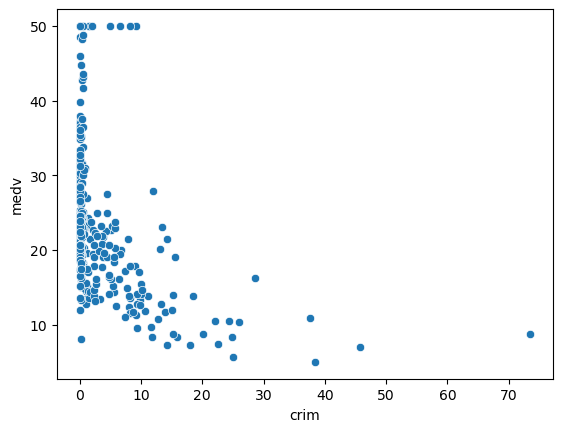

In [5]:
sns.scatterplot(x='crim', y='medv', data=df)

Строим график по параметрам rm, medv

<Axes: xlabel='rm', ylabel='medv'>

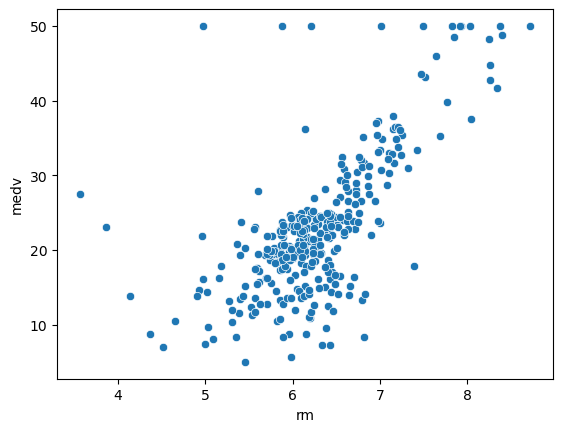

In [6]:
sns.scatterplot(x='rm', y='medv', data=df)

- Сформируем х и y из df
- Данные разделим на данные для обучения и проверки
- Создадим и обучим модель LinearRegression 
- Качество оценим на тестовой выборке с использованием метрики среднеквадратичной ошибки

In [7]:
X = df[['rm']] 
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 36.361622515889756


Так как таргет не достигнут, и нет инструментов тонкой настройки, то будем просто смотреть подходящие комбинации фичей

In [8]:
features = df.columns.drop('medv')
combinations_of_features = []
for r in range(1, len(features) + 1):
    combinations_of_features.extend(combinations(features, r))
best_mse = float('inf')
best_combination = None
for combo in combinations_of_features:
    X = df[list(combo)]
    y = df['medv']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    #print('Текущая MSE:', mse)
    #print('Комбинация признаков:', combo)
    if mse < best_mse:
        best_mse = mse
        best_combination = combo

# Вывод лучшего MSE и соответствующего набора признаков
print('Лучшая MSE:', best_mse)
print('Лучшая комбинация признаков:', best_combination)

Лучшая MSE: 19.797345349410897
Лучшая комбинация признаков: ('crim', 'nox', 'rm', 'dis', 'ptratio', 'black', 'lstat')


Принимаем тот факт, что значение метрики адаптировано под текущий сплит, и ДЗ не подразумевает глубокий анализ признаков и валидацию модели

In [9]:
X = df[list(best_combination)]
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

19.797345349410897

Используем тот же "ленивый" подход для прогноза уровня оксида азота

In [10]:
features_nox = df.columns.drop('nox')
combinations_of_features_nox = []
for r in range(1, len(features) + 1):
    combinations_of_features_nox.extend(combinations(features_nox, r))
best_mse_nox = float('inf')
best_combination_nox = None
for combo in combinations_of_features_nox:
    X = df[list(combo)]
    y = df['nox']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    #print('Текущая MSE:', mse)
    #print('Комбинация признаков:', combo)
    if mse < best_mse:
        best_mse_nox = mse
        best_combination_nox = combo

# Вывод лучшего MSE и соответствующего набора признаков
print('Лучшая MSE:', best_mse_nox)
print('Лучшая комбинация признаков:', best_combination_nox)

Лучшая MSE: 0.0031781885468284607
Лучшая комбинация признаков: ('ID', 'crim', 'zn', 'indus', 'chas', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv')


In [11]:
X = df[list(best_combination_nox)]
y = df['nox']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model_nox = LinearRegression()
final_model_nox.fit(X_train, y_train)
y_pred = final_model_nox.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.0031781885468284607